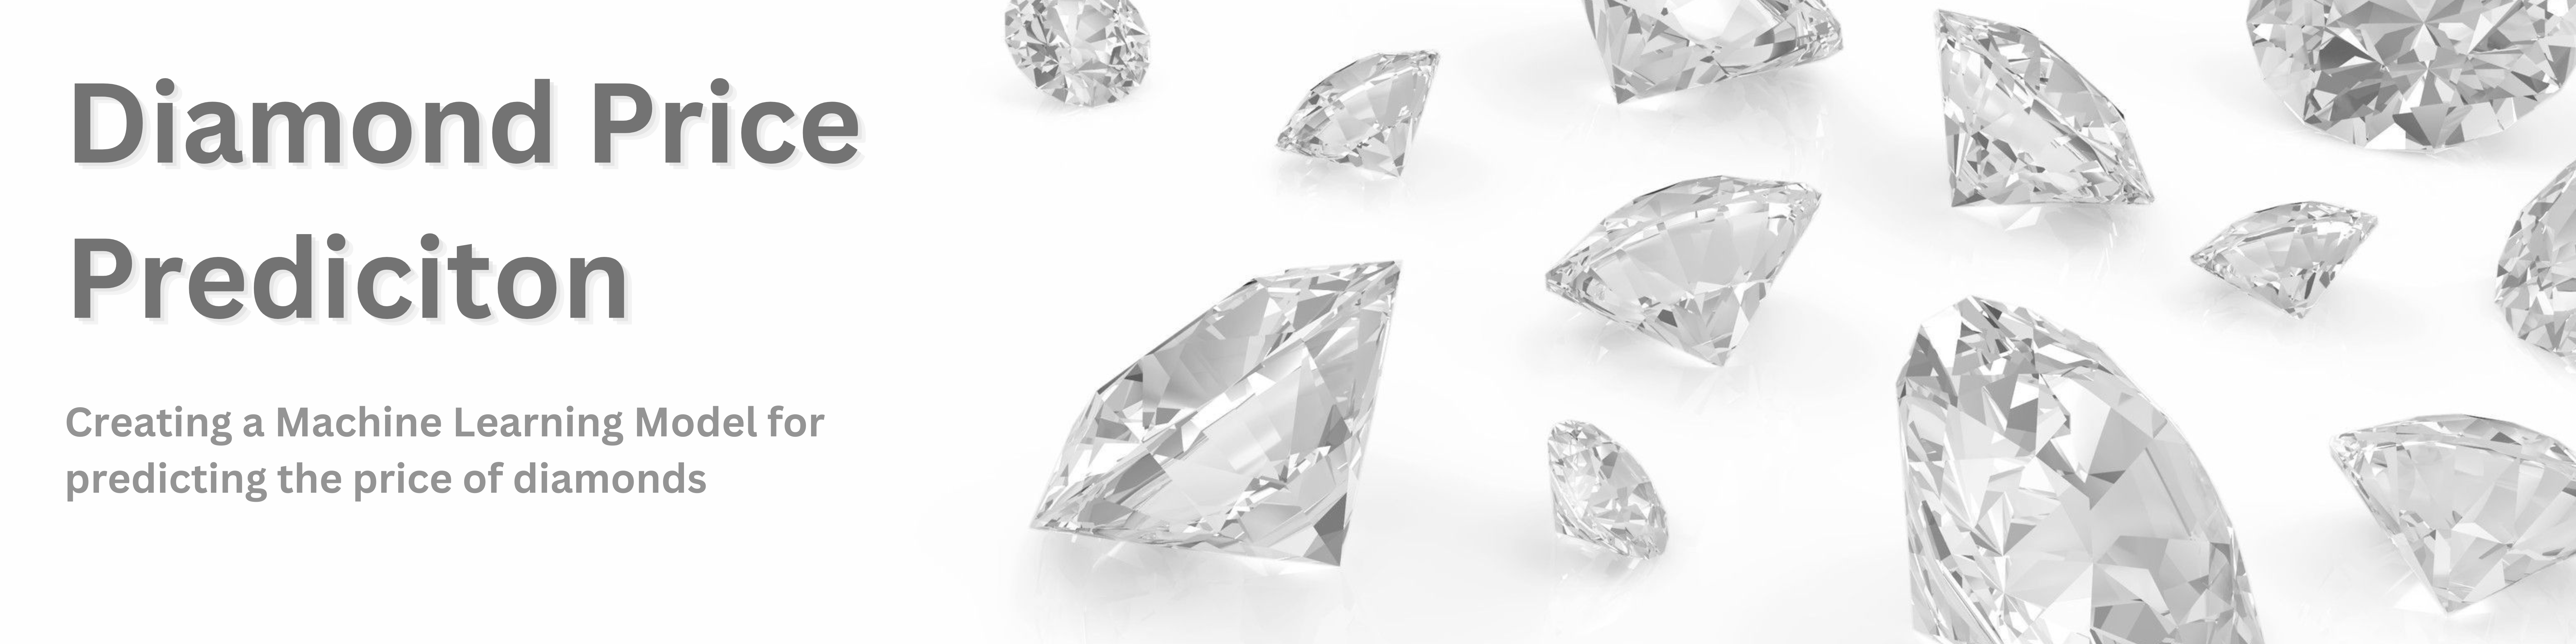

## About Data

**Context**

This classic dataset contains the prices and other attributes of almost 54,000 diamonds.

**Content**
-  price: price in US dollars (\$326--\$18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x length: in mm (0--10.74)
- y width: in mm (0--58.9)
- z depth: in mm (0--31.8)
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)

**In this Machine Learning model we will work on Predicting the prices of diamonds according to these chracteristics**


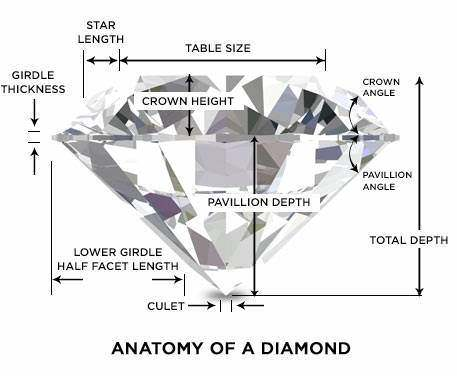

# Getting and Cleaning Data

In [94]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
# loading datasets
train = pd.read_csv(r'E:\Projects\07. [ML] End to End - Diamond Prize\train.csv')
test = pd.read_csv(r'E:\Projects\07. [ML] End to End - Diamond Prize\test.csv')

In [96]:
train.head()

Id  carat      cut color clarity  depth  table  price     x     y     z
0   1   1.06    Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  4.07
1   2   1.51  Premium     G    VVS2   60.9   58.0  15164  7.38  7.42  4.51
2   3   0.32    Ideal     F     VS2   61.3   56.0    828  4.43  4.41  2.71
3   4   0.53    Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  3.19
4   5   0.70  Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  3.50

In [97]:
test.head()

Id  carat        cut color clarity  depth  table     x     y     z
0   1   0.34      Ideal     G    VVS2   61.1   57.0  4.52  4.48  2.75
1   2   0.71    Premium     E     VS2   62.7   58.0  5.74  5.68  3.58
2   3   0.44  Very Good     I     VS1   62.8   56.0  4.83  4.88  3.05
3   4   0.81    Premium     E     SI2   60.1   59.0  6.09  6.03  3.65
4   5   0.40      Ideal     G    VVS1   61.2   56.0  4.74  4.80  2.92

In [98]:
print(train.shape)
print(test.shape)

(43152, 11)
(10788, 10)


In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [100]:
train.describe()

Id         carat         depth         table         price  \
count  43152.000000  43152.000000  43152.000000  43152.000000  43152.000000   
mean   21576.500000      0.797855     61.747177     57.458347   3929.491912   
std    12457.053745      0.473594      1.435454      2.233904   3985.527795   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    10788.750000      0.400000     61.000000     56.000000    947.750000   
50%    21576.500000      0.700000     61.800000     57.000000   2401.000000   
75%    32364.250000      1.040000     62.500000     59.000000   5312.000000   
max    43152.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  43152.000000  43152.000000  43152.000000  
mean       5.731568      5.735018      3.538568  
std        1.121279      1.148809      0.708238  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

From these past cells we make some modificationsfor more reliability:
1. The first column is an index and could be no included in data as It's not useful.




In [101]:
# Dropping 1st column
train.drop(columns=train.columns[0], axis=1, inplace=True)


2. X,Y and Z values have a min of 0 which cannot be real.

In [102]:
# Dropping faulty values
train = train.drop(train[train["x"]==0].index)
train = train.drop(train[train["y"]==0].index)
train = train.drop(train[train["z"]==0].index)

3. We can check for duplicate and null values

In [103]:
print(train.isna().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [104]:
print(train.duplicated().sum())

97


In [105]:
# Getting rid of duplicate values
train.drop_duplicates(inplace=True)

###  Data Exploration and Analysis

Step 1: Removing Outliers

In [106]:
train.corr()['price'].sort_values()

depth   -0.013395
table    0.128029
y        0.862800
z        0.864745
x        0.887122
carat    0.921864
price    1.000000
Name: price, dtype: float64

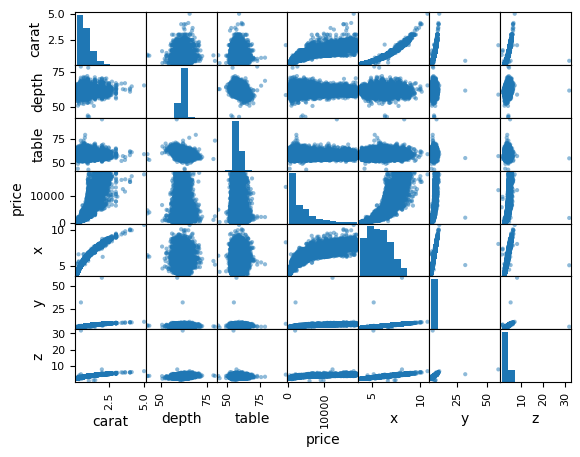

In [107]:
from pandas.plotting import scatter_matrix

atts = ['carat', 'depth', 'table', 'price','x' , 'y', 'z']
scatter_matrix(train[atts])
plt.show()

From these plots we can say that: 
- x,y and z have some outliers
- table and depth are the least relevant features


Text(0.5, 1.0, 'Scatter plot of price vs table')

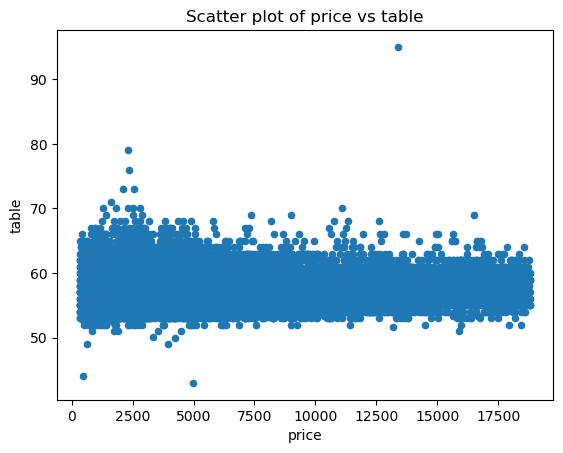

In [108]:
train.plot(kind='scatter', x='price', y='table')
plt.title('Scatter plot of price vs table')

Text(0.5, 1.0, 'Scatter plot of price vs carat')

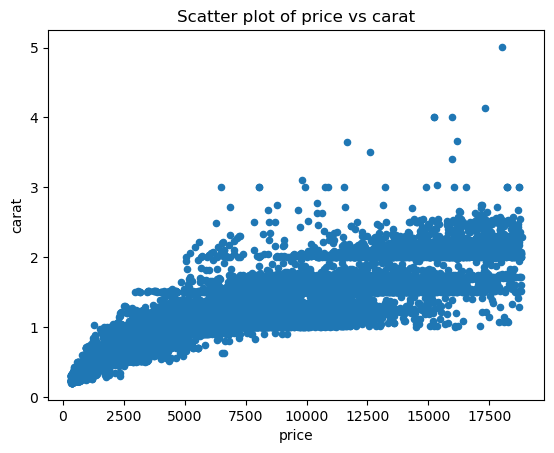

In [109]:
train.plot(kind='scatter', x='price', y='carat')
plt.title('Scatter plot of price vs carat')

Text(0.5, 1.0, 'boxplot of price vs color')

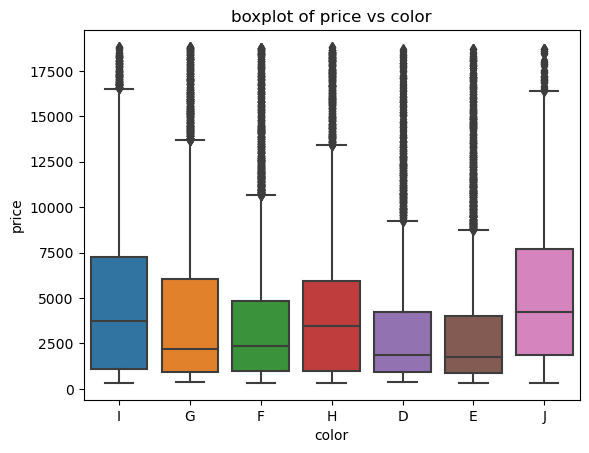

In [110]:
sns.boxplot(x="color", y="price", data=train)
plt.title('boxplot of price vs color')


Text(0.5, 1.0, 'boxplot of price vs cut')

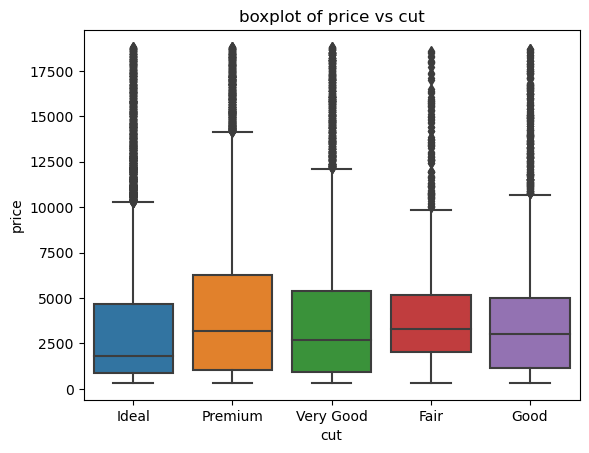

In [111]:
sns.boxplot(x="cut", y="price", data=train)
plt.title('boxplot of price vs cut')


Text(0.5, 1.0, 'boxplot of price vs clarity')

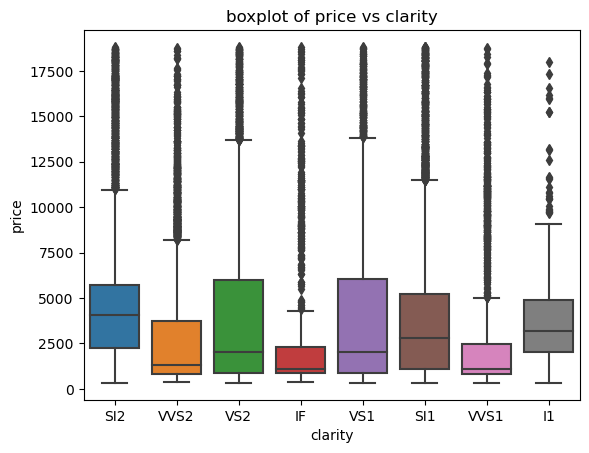

In [112]:
sns.boxplot(x="clarity", y="price", data=train)
plt.title('boxplot of price vs clarity')


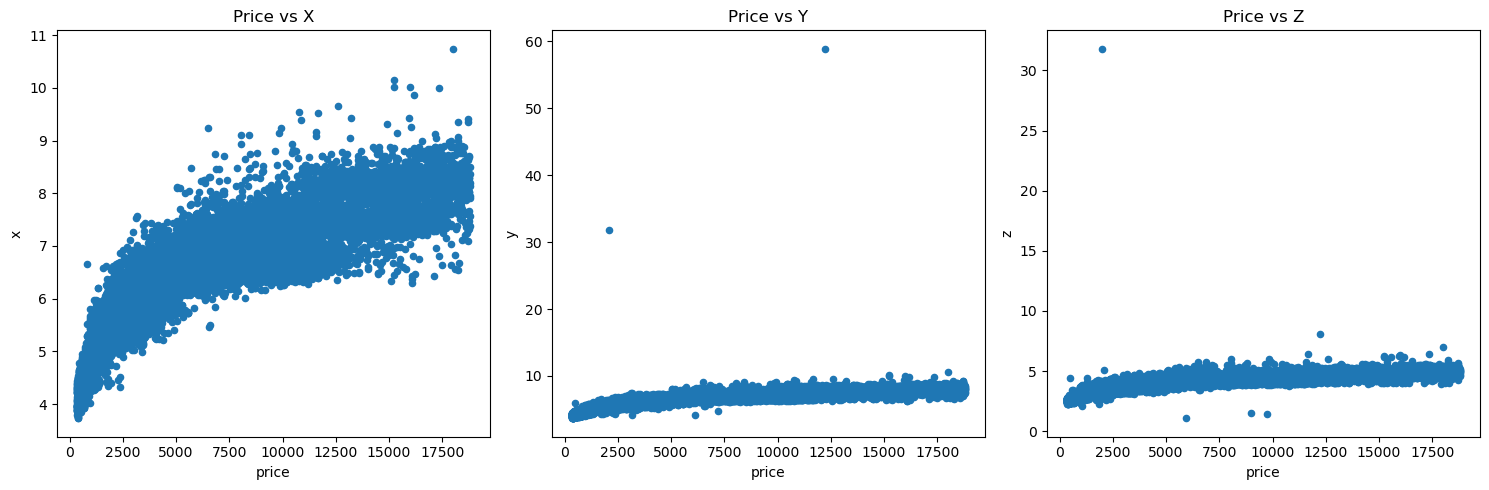

In [113]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))

train.plot(kind='scatter', x='price', y='x', ax=axes[0])
train.plot(kind='scatter', x='price', y='y', ax=axes[1])
train.plot(kind='scatter', x='price', y='z', ax=axes[2])

axes[0].set_title("Price vs X")
axes[1].set_title("Price vs Y")
axes[2].set_title("Price vs Z")
fig.tight_layout()
plt.show()

In [114]:
# Dropping outliers
train = train[(train["depth"]<75)&(train["depth"]>45)]
train = train[(train["table"]<80)&(train["table"]>40)]
train = train[(train["x"]<20)]
train = train[(train["y"]<20)]
train = train[(train["z"]<20)]
train.shape

(43029, 10)

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43029 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43029 non-null  float64
 1   cut      43029 non-null  object 
 2   color    43029 non-null  object 
 3   clarity  43029 non-null  object 
 4   depth    43029 non-null  float64
 5   table    43029 non-null  float64
 6   price    43029 non-null  int64  
 7   x        43029 non-null  float64
 8   y        43029 non-null  float64
 9   z        43029 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.6+ MB


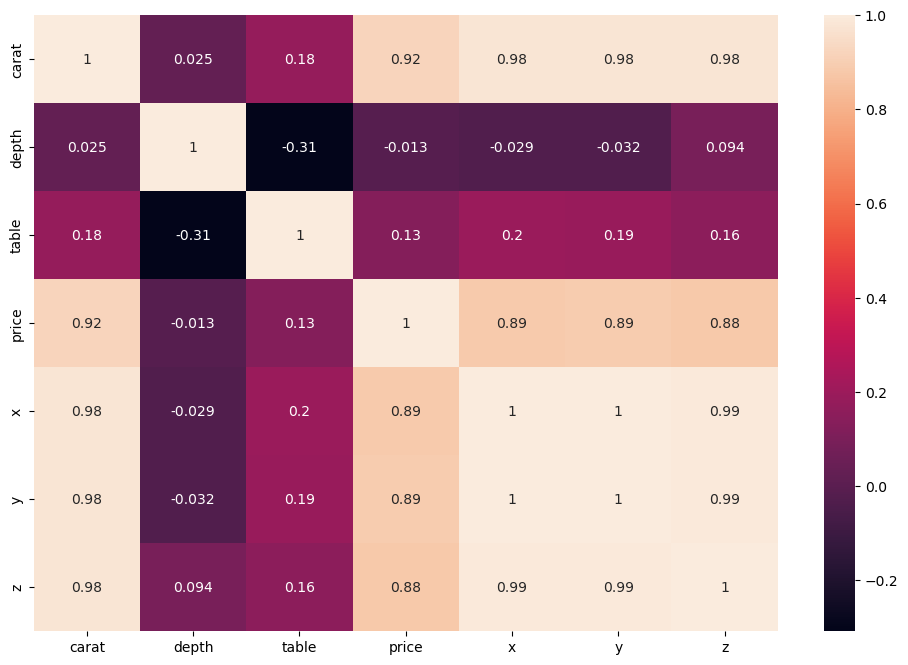

In [126]:
coorr = train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(coorr, annot=True)
plt.show()

# Feature Selcetion

Once we cleaned the dataset we can now go to the step of solving categorical values problem. We have 3 categorical variables (cut, color and clarity).

In [123]:
# Importing libraries
from sklearn.preprocessing import LabelEncoder

# Making copies to avoid messing with the original dataset
train_set = train.copy()

In [121]:
# putting the objects into 1 list for the upcoming code
x = train_set.dtypes == 'object'
lst = list(x[x].index)
lst

['cut', 'color', 'clarity']

In [125]:
# Using label encoding 
ohot = LabelEncoder()
for item in lst:
    train_set[item] = ohot.fit_transform(train_set[item])
    test[item] = ohot.fit_transform(test[item])

## Model Building 

In [132]:
# Importing all needed libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
import math

In [127]:
x= train_set.drop(columns='price')
y = train_set['price']

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

### Linear Regression

In [136]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [137]:
y_predict = lr.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
r2 = metrics.r2_score(y_test, y_predict)
rmse = math.sqrt(mse)

print(f'MAE = {mae}')
print(f'MSE = {mse}')
print(f'R2 = {r2}')
print(f'RMSE = {rmse}')


MAE = 859.2260274569074
MSE = 1900478.4835931147
R2 = 0.8820098492457112
RMSE = 1378.5784285245127


### Random Forest

In [138]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [139]:
y_predict = rf.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
r2 = metrics.r2_score(y_test, y_predict)
rmse = math.sqrt(mse)

print(f'MAE = {mae}')
print(f'MSE = {mse}')
print(f'R2 = {r2}')
print(f'RMSE = {rmse}')


MAE = 278.72151851698146
MSE = 324871.04940565105
R2 = 0.9798305613949359
RMSE = 569.9746041760554


In [140]:
data_train_x = train_set.drop(columns='price')
data_train_y = train_set['price']

### Creating Model by pipeline

In [142]:
pipeline_lr = Pipeline([("scalar1", MinMaxScaler()),
                     ("lr", LinearRegression())])

pipeline_rf =Pipeline([("scalar2", MinMaxScaler()),
                     ("rf", RandomForestRegressor(n_estimators=400,
                                  max_features='sqrt',))])

pipelines = [pipeline_lr, pipeline_rf]
pipeline_dict = {0: "LinearRegression",1: "RandomForest"}

In [143]:
# Linear Reression score
pipeline_lr.fit(x_train, y_train)
pipeline_lr.score(x_train,y_train)

0.889113103799568

In [144]:
# Random Forest score
pipeline_rf.fit(x_train, y_train)
pipeline_rf.score(x_train,y_train)

0.9969313413975105

In [ ]:
# Predicitng test dataset
prediction = pipeline_rf.predict(test)